In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Raw Data/Boston_Housing_from_Sklearn.csv')
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [6]:
# create target (y) and features (X)
y = df['PRICE']
X = df.drop(columns = 'PRICE')

In [7]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [9]:
# run regression model with default parameters
unlimited_tree = DecisionTreeRegressor(random_state = 42)
unlimited_tree.fit(X_train, y_train)
train_score = unlimited_tree.score(X_train, y_train)
test_score = unlimited_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.6193230918136841


Model with default parameters is overfit

In [10]:
# determine the depth of default tree
unlimited_tree.get_depth()

20

Determine the optimal max_depth based on the best r2 value

In [11]:
# create function
max_depth_range = list(range(2,20))
r2 = []
for depth in max_depth_range:
  dec_tree = DecisionTreeRegressor(max_depth = depth, random_state = 42)
  dec_tree.fit(X_train, y_train)
  score = dec_tree.score(X_test, y_test)
  r2.append(score)

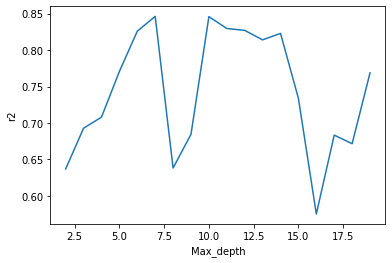

In [12]:
# visualize max_depth vs r2
plt.plot(max_depth_range, r2)
plt.xlabel('Max_depth')
plt.ylabel('r2');

The optimal max_depth is either 7 or 10 based on the above function.  Further trials below.

In [14]:
seven_tree = DecisionTreeRegressor(max_depth = 7, random_state = 42)
seven_tree.fit(X_train, y_train)
train7score = seven_tree.score(X_train, y_train)
test7score = seven_tree.score(X_test, y_test)
print(train7score)
print(test7score)

0.958516936961625
0.8463768203632204


In [15]:
ten_tree = DecisionTreeRegressor(max_depth = 10, random_state = 42)
ten_tree.fit(X_train, y_train)
train10score = ten_tree.score(X_train, y_train)
test10score = ten_tree.score(X_test, y_test)
print(train10score)
print(test10score)

0.9867962386381032
0.8460104271509634


Based on these trials, the optimal max_depth for this model is 7.

In [17]:
# what is the r2 of your final model on the training set and the test set?
seven_tree = DecisionTreeRegressor(max_depth = 7, random_state = 42)
seven_tree.fit(X_train, y_train)
train7score = seven_tree.score(X_train, y_train)
test7score = seven_tree.score(X_test, y_test)
print('The r2 of the final model on the training set is', train7score)
print('The r2 of the final model on the test set is', test7score)

The r2 of the final model on the training set is 0.958516936961625
The r2 of the final model on the test set is 0.8463768203632204
